# Implementing-Basic-ANPR
This project aims to implement basic ANPR(Automatic Number Plate Recognition system) using OpenCV and Easyocr (PyTorch) in Python. The program extracts the number plate information from a picture or a static videoframe and stores it in CSV file with date of entry.

# What is ANPR ?
Automatic number-plate recognition is a technology that uses optical character recognition on images to read vehicle registration plates to create vehicle location data. It can use existing closed-circuit television, road-rule enforcement cameras, or cameras specifically designed for the task. ANPR is an advanced version of what I am going to show you in this article. Here, we will be implementing the software part. The hardware part can be implemented using CCTV cameras and Raspberry Pi.

# Steps involved :

1. Read the original image.
2. Convert it to grayscale and blur.
3. Apply filter and find edges for localization.
4. Find the contours and apply mask.
5. Read the text using Easyocr.
6. Render Result

In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr

# 1. Read in Image, Grayscale and Blur

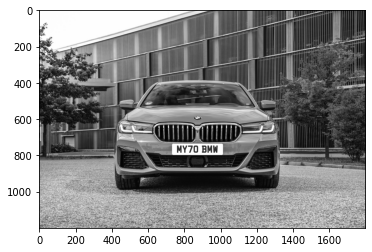

In [8]:
img = cv2.imread('car6.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

# 2. Apply filter and find edges for localization

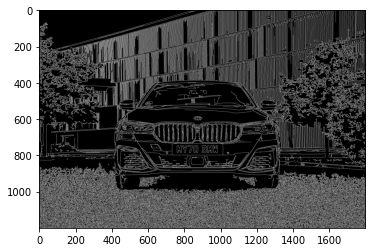

In [9]:
bfilter = cv2.bilateralFilter(gray, 11, 17, 17) #Noise reduction
edged = cv2.Canny(bfilter, 30, 200) #Edge detection
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

# 3. Find Contours and Apply Mask

In [10]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

In [11]:
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break

In [12]:
location

array([[[ 732,  740]],

       [[1008,  735]],

       [[1012,  793]],

       [[ 738,  798]]], dtype=int32)

In [13]:

mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0,255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)

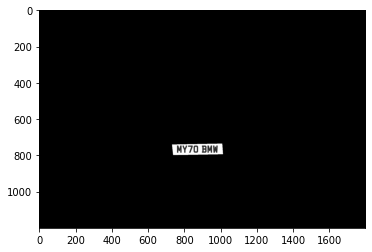

In [14]:

plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

In [15]:

(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]

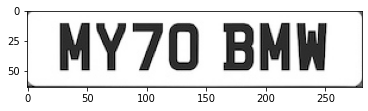

In [16]:

plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

# 4. Use Easy OCR To Read Text

In [17]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
result


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[22, 4], [260, 4], [260, 58], [22, 58]], 'MY7O BMH', 0.6687815810855032)]

# Result

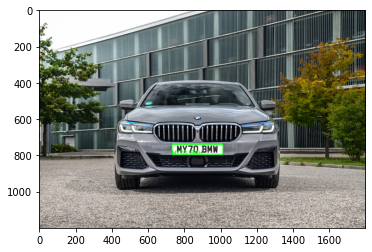

In [18]:
text = result[0][-2]
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1]+60), fontFace=font, fontScale=1, color=(0,255,0), thickness=2, lineType=cv2.LINE_AA)
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))